In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error


In [2]:
# Read data
df = pd.read_csv("../../STB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,13400.0,12850.0,13500.0,12700.0,16.33M,4.28%
1,1/3/2018,13350.0,13500.0,13600.0,13250.0,15.70M,-0.37%
2,1/4/2018,13600.0,13350.0,13850.0,13350.0,26.49M,1.87%
3,1/5/2018,13600.0,13700.0,13800.0,13450.0,17.26M,0.00%
4,1/8/2018,14550.0,13700.0,14550.0,13700.0,33.85M,6.99%
...,...,...,...,...,...,...,...
1487,12/15/2023,27100.0,27100.0,27450.0,27050.0,12.86M,0.00%
1488,12/18/2023,26300.0,27100.0,27200.0,26300.0,21.73M,-2.95%
1489,12/19/2023,26600.0,26300.0,26600.0,25850.0,18.26M,1.14%
1490,12/20/2023,26950.0,26700.0,26950.0,26450.0,8.22M,1.32%


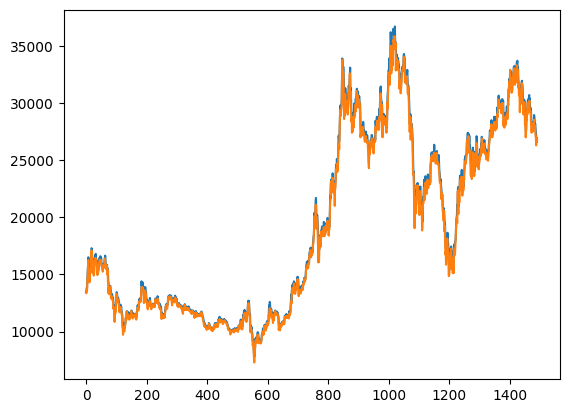

In [3]:
#Choose the independent,dependent variable 
y = df[["Price"]] # predictor 
X= df[["High"]] #independent variable
plt.plot(X)
plt.plot(y)
plt.show()

In [4]:
# Split the data into training, testing sets by 7:3
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:

# params = {
#     'max_depth': [3, 7],
#     'learning_rate': [0.05, 0.01, 0.001],
#     'n_estimators': [700, 1000],
#     'colsample_bytree': [0.5,1]
# }

# # Create an XGBRegressor instance
# xgbr = XGBRegressor()

# # Create a GridSearchCV instance
# model = GridSearchCV(
#     estimator=xgbr,
#     param_grid=params,
#     scoring='neg_mean_squared_error',
#     verbose=1
# )

# # Assuming X and y are your feature matrix and target variable
# model.fit(X_train, y_train)
# # Print the best parameters and lowest RMSE
# print("Best parameters:", model.best_params_)
# print("Lowest RMSE:", (-model.best_score_)**(1/2.0))

In [6]:
# Add model from searching  the best model which is evaluted by mean square root 
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000,colsample_bytree=0.5, learning_rate=0.05, max_depth=3)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
#make the predictions
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [8]:
#calculate some metrics
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
msle = mean_squared_log_error(y_test, y_pred)
print("MAPE:", mape)
print("MAE: ",  mae)
print("RMSE:", rmse)
print("MSLE: ", msle)

MAPE: 1.2236016873965225
MAE:  299.2549503871373
RMSE: 380.7457531504658
MSLE:  0.0002571435256718638


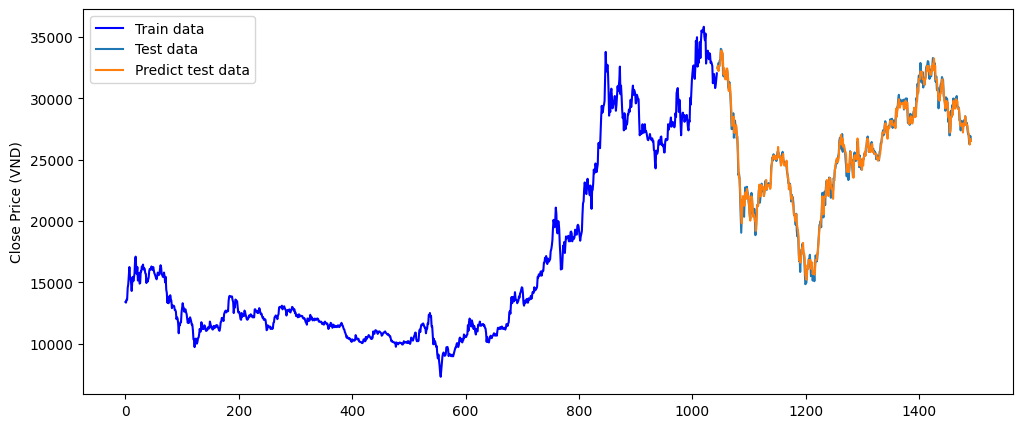

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

In [10]:
#Take the last value from the dataset
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[26850.]])

In [11]:
#Make a prediction for next 30 days
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

print("Ket qua du doan XGBoost ", x_next_30_day)


Ket qua du doan XGBoost  [array([26529.22], dtype=float32), array([26014.057], dtype=float32), array([25635.664], dtype=float32), array([25175.857], dtype=float32), array([24530.316], dtype=float32), array([24010.215], dtype=float32), array([23535.379], dtype=float32), array([22944.828], dtype=float32), array([22760.664], dtype=float32), array([22321.193], dtype=float32), array([22013.148], dtype=float32), array([21314.953], dtype=float32), array([20361.275], dtype=float32), array([19815.123], dtype=float32), array([19489.014], dtype=float32), array([18675.46], dtype=float32), array([18223.299], dtype=float32), array([18103.2], dtype=float32), array([17771.588], dtype=float32), array([17338.268], dtype=float32), array([16827.879], dtype=float32), array([16414.473], dtype=float32), array([16100.4795], dtype=float32), array([15804.187], dtype=float32), array([15603.954], dtype=float32), array([15325.353], dtype=float32), array([15220.451], dtype=float32), array([14783.697], dtype=float32

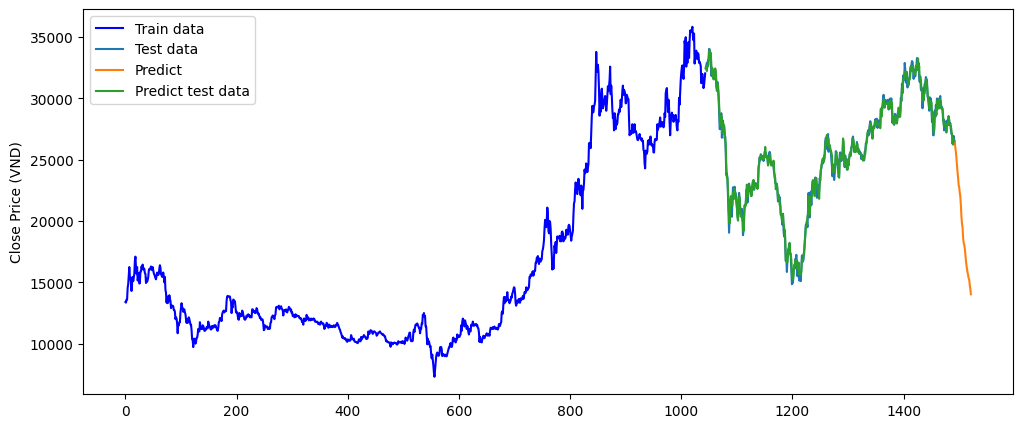

In [13]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Predict')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

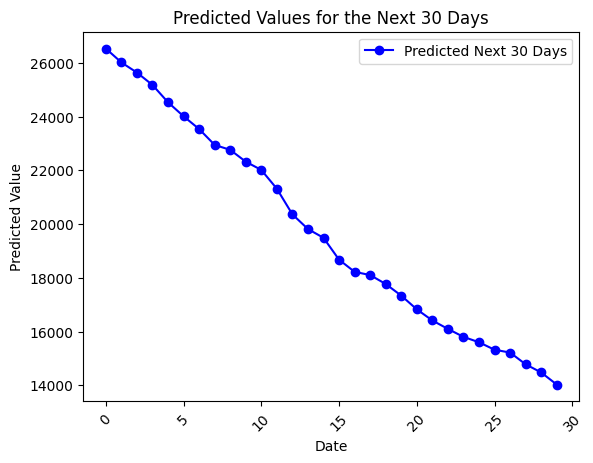

In [15]:
# Vẽ biểu đồ

plt.plot(x_next_30_day, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()